In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ea2c2f1de282b6daa335757d472f4be


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | celestun
Processing Record 7 of Set 1 | limon
Processing Record 8 of Set 1 | ayan
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | buon me thuot
City not found. Skipping...
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | boyolangu
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | kaliua
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | lufilufi
Processing Record 22 of Set 1 | kahului
Processing Record 23 of Set 1 | saleaula
City not found. Skippin

Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | nehe
Processing Record 41 of Set 4 | greenville
Processing Record 42 of Set 4 | jardanhaza
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | romitan
Processing Record 45 of Set 4 | coari
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | fomboni
Processing Record 50 of Set 4 | amazar
Processing Record 1 of Set 5 | ojinaga
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | kletskaya
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | nieuw amsterdam
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 5 | whitley bay
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | sosnovo-ozerskoye
Processing Record 10 of Set 5 | gorontalo
Processing Record 11 of Set 5 | zhongshu
Processing Record 12 of Set 5 | athabasca
Processing 

Processing Record 28 of Set 8 | rio grande
Processing Record 29 of Set 8 | trat
Processing Record 30 of Set 8 | porbandar
Processing Record 31 of Set 8 | karatuzskoye
Processing Record 32 of Set 8 | rungata
City not found. Skipping...
Processing Record 33 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 34 of Set 8 | krasnyy chikoy
Processing Record 35 of Set 8 | ngaoundere
Processing Record 36 of Set 8 | chegdomyn
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | vao
Processing Record 40 of Set 8 | black river
Processing Record 41 of Set 8 | jambi
Processing Record 42 of Set 8 | dryden
Processing Record 43 of Set 8 | tonj
Processing Record 44 of Set 8 | manbij
Processing Record 45 of Set 8 | berlevag
Processing Record 46 of Set 8 | la crosse
Processing Record 47 of Set 8 | souillac
Processing Record 48 of Set 8 | aykhal
Processing Record 49 of Set 8 | fairbanks
Processing Record 50 of Set 8 | gariaba

Processing Record 11 of Set 12 | druzhba
Processing Record 12 of Set 12 | matara
Processing Record 13 of Set 12 | nome
Processing Record 14 of Set 12 | buala
Processing Record 15 of Set 12 | tigil
Processing Record 16 of Set 12 | likasi
Processing Record 17 of Set 12 | tessalit
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | lasa
Processing Record 20 of Set 12 | nemuro
Processing Record 21 of Set 12 | dinghai
Processing Record 22 of Set 12 | killybegs
Processing Record 23 of Set 12 | columbus
Processing Record 24 of Set 12 | russell
Processing Record 25 of Set 12 | tynda
Processing Record 26 of Set 12 | santa cruz cabralia
Processing Record 27 of Set 12 | grand centre
City not found. Skipping...
Processing Record 28 of Set 12 | nalut
Processing Record 29 of Set 12 | santa fe
Processing Record 30 of Set 12 | charters towers
Processing Record 31 of Set 12 | aklavik
Processing Record 32 of Set 12 | goure
Processing Record 33 of Set 12 | novikovo
Processin

In [10]:
len(city_data)

568

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.13,140.30,82.99,88,75,31.09,JP,2020-07-07 01:14:02
1,Busselton,-33.65,115.33,57.00,63,100,11.88,AU,2020-07-07 01:13:32
2,Arraial Do Cabo,-22.97,-42.03,72.41,84,0,9.80,BR,2020-07-07 01:11:32
3,Port Alfred,-33.59,26.89,63.00,83,1,7.00,ZA,2020-07-07 01:14:02
4,Georgetown,5.41,100.34,82.40,94,40,3.36,MY,2020-07-07 01:10:04
5,Celestun,20.87,-90.40,86.97,63,44,11.83,MX,2020-07-07 01:14:02
6,Limon,10.00,-83.03,84.20,79,40,8.05,CR,2020-07-07 01:14:03
7,Ayan,56.45,138.17,51.46,81,100,6.20,RU,2020-07-07 01:14:03
8,Tiksi,71.69,128.87,38.84,86,87,5.55,RU,2020-07-07 01:14:03
9,Talnakh,69.49,88.40,62.60,72,100,6.71,RU,2020-07-07 01:14:03


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2020-07-07 01:14:02,35.13,140.30,82.99,88,75,31.09
1,Busselton,AU,2020-07-07 01:13:32,-33.65,115.33,57.00,63,100,11.88
2,Arraial Do Cabo,BR,2020-07-07 01:11:32,-22.97,-42.03,72.41,84,0,9.80
3,Port Alfred,ZA,2020-07-07 01:14:02,-33.59,26.89,63.00,83,1,7.00
4,Georgetown,MY,2020-07-07 01:10:04,5.41,100.34,82.40,94,40,3.36
5,Celestun,MX,2020-07-07 01:14:02,20.87,-90.40,86.97,63,44,11.83
6,Limon,CR,2020-07-07 01:14:03,10.00,-83.03,84.20,79,40,8.05
7,Ayan,RU,2020-07-07 01:14:03,56.45,138.17,51.46,81,100,6.20
8,Tiksi,RU,2020-07-07 01:14:03,71.69,128.87,38.84,86,87,5.55
9,Talnakh,RU,2020-07-07 01:14:03,69.49,88.40,62.60,72,100,6.71


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

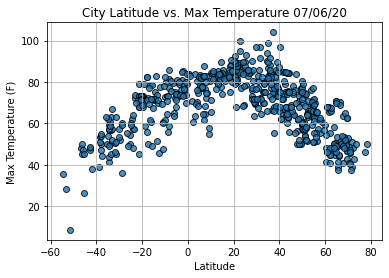

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

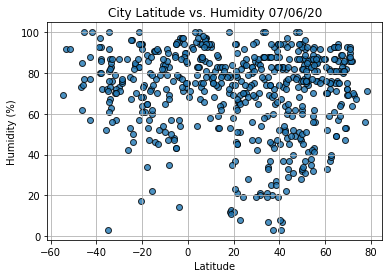

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

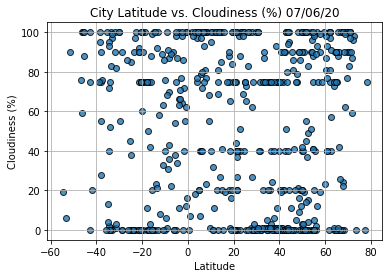

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show plot
plt.show()

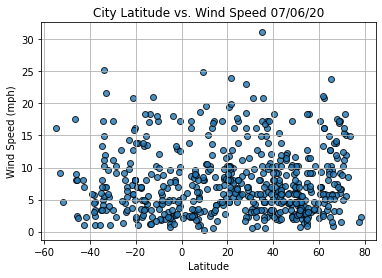

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

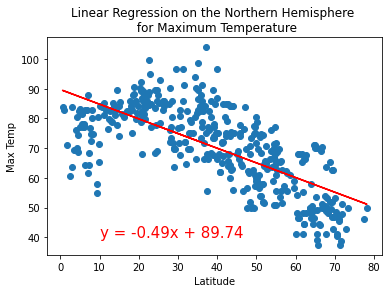

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

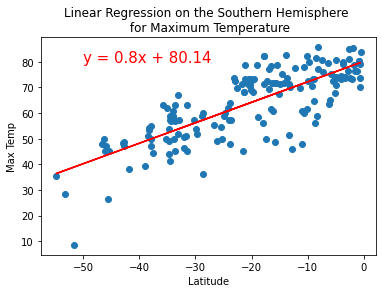

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

In [25]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.4938658839459936, intercept=89.74257170804356, rvalue=-0.6991326165670161, pvalue=1.523911564721906e-60, stderr=0.025190548791007992)

In [26]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.7983067769774826, intercept=80.13967938476846, rvalue=0.7846875539550603, pvalue=1.8001797571611898e-35, stderr=0.04954857963136202)

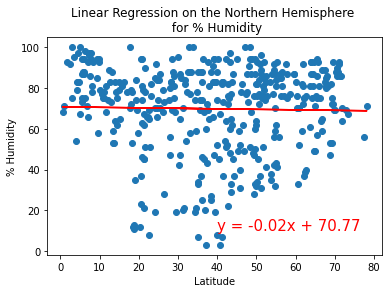

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

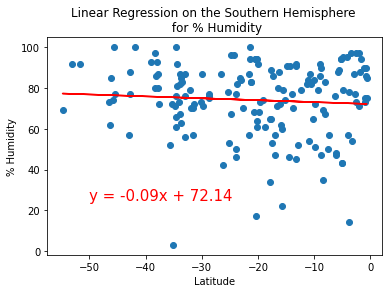

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

In [29]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

LinregressResult(slope=-0.02472374496953329, intercept=70.77147497330151, rvalue=-0.022468299110230044, pvalue=0.6525195342625991, stderr=0.054868284624860715)

In [30]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

LinregressResult(slope=-0.09382040928819306, intercept=72.14378261847895, rvalue=-0.06972928090008891, pvalue=0.3749600086259399, stderr=0.1054547744151511)

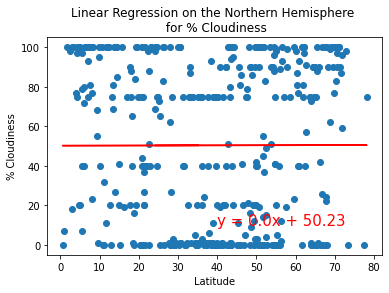

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

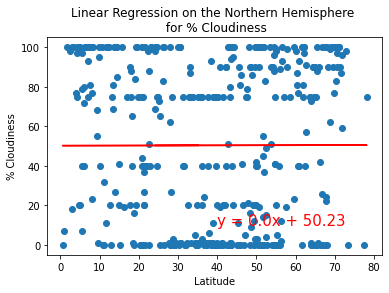

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

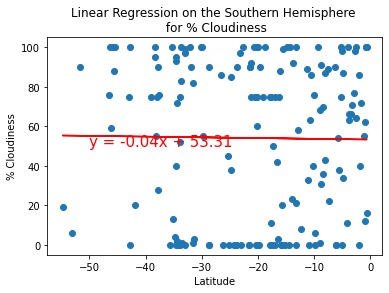

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,50))

In [34]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.0029613070536592474, intercept=50.23348081006402, rvalue=0.0014318264768844984, pvalue=0.9771116735210037, stderr=0.1031524578161519)

In [35]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

LinregressResult(slope=-0.037297763621154764, intercept=53.30615359410766, rvalue=-0.01281673122391022, pvalue=0.8706085872983493, stderr=0.22861900728607054)

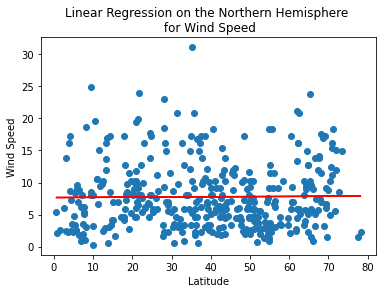

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

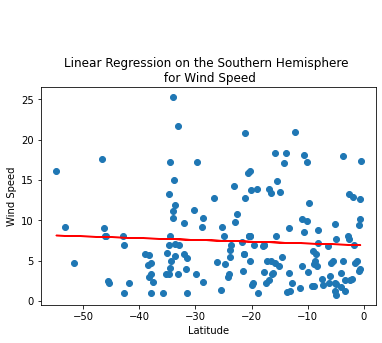

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [38]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

LinregressResult(slope=0.002885075373360749, intercept=7.657395420854917, rvalue=0.011102099126181032, pvalue=0.8239520219210887, stderr=0.012960216904376735)

In [39]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

LinregressResult(slope=-0.02214588070963587, intercept=6.905003544267531, rvalue=-0.05736729268924201, pvalue=0.46560922130321436, stderr=0.030279958988826627)